# 7.1. First, we validate the models made with my annotations

In [5]:
annotator_ID=20 # change this to your folder ID

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"

#path_to_model_medium=my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/seedlingsDetection_YOLOm_img608_20/weights/best.pt"
#path_to_model_nano=my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/seedlingsDetection_YOLOn_img416_20/weights/best.pt"
#path_to_model_large=my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/seedlingsDetection_YOLOl_img800_20/weights/best.pt"

# seedlingsDetection_YOLOn_img416_20
# seedlingsDetection_YOLOl_img800_20

path_to_model = my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/seedlingsDetection_YOLOn_img800_annotations_20/weights/best.pt"
path_to_yaml= my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/train_config.yaml"


In [6]:

path_to_yaml

'/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/train_config.yaml'

In [2]:
!pip -q install geopandas
%pip install ultralytics
import ultralytics
ultralytics.checks()

# general libraries
import os, glob
from pathlib import Path

# Geospatial libraries
import geopandas as gpd
from osgeo import gdal, osr
from shapely.geometry import Polygon


Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [7]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Validate using YOLOv8 builtin "val" function
this provides a standard method for validation of bounding box detectors



In [10]:
my_drive_path+"/testing/"+str(annotator_ID)
path_to_model

'/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/seedlingsDetection_YOLOn_img800_annotations_20/weights/best.pt'

In [9]:
!yolo val model=$path_to_model data=$path_to_yaml split='test' imgsz=800 project="/content/drive/MyDrive/HOME_EXAM/data/testing/20" name="test_eval_full_20"

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 17.9MB/s]
val: Scanning /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/labels... 228 images, 0 backgrounds, 31 corrupt: 100% 228/228 [01:41<00:00,  2.26it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/images/galbyveien_20230504_sun_11_23.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0109]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/images/galbyveien_20230504_sun_11_24.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/images/galbyveien_20230504_sun_12_21.tif: ignoring corrupt image/label: non-normalized or out of bounds coord

Now with the results of theis performance on classiying the test data, we can calculate the Precision, the Recall and the F1-score for each model.

In [13]:
# Yolo nano
p = 1011/(1011+409)
r = 1011/(1011+1597)
f1 = (2*p*r)/(p+r)

print(p)
print(r)
print(f1)

0.7119718309859155
0.38765337423312884
0.5019860973187686


The best model in terms of F1 is YOLO large. However, there is not a huge difference so I would choose YOLO medium, which would allow me to mount the YOLO in a more portable device.

# 7.2. Now validate models from all annotations

In [14]:
annotator_ID="full_data" # change this to your folder ID

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"

path_to_model=my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/all_data/seedlings_YOLOn_img608_annotations_full_data/weights/best.pt"

path_to_yaml= my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/all_data/train_config.yaml"


In [15]:
!yolo val model=$path_to_model data=$path_to_yaml split='test' imgsz=416 project="/content/drive/MyDrive/HOME_EXAM/data/testing/full_data" name="test_eval_full_full_data"


Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/labels.cache... 228 images, 0 backgrounds, 31 corrupt: 100% 228/228 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/images/galbyveien_20230504_sun_11_23.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0109]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/images/galbyveien_20230504_sun_11_24.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]
val: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1uk3Gv6pkpnZjfaVGck54kT5iNAe8O_sL/test/images/galbyveien_20230504_sun_12_21.tif: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0065]
val: WARNING ⚠️ /con

In [16]:
# Yolo nano
p = 589/(589+103)
r = 589/(589+2019)
f1 = (2*p*r)/(p+r)

print(p)
print(r)
print(f1)

0.8511560693641619
0.2258435582822086
0.35696969696969694


The best model in terms of F1 is YOLO nano which obtained smilar results to the models made with my annotations (a lot less) which denotes how my annotations are better in general.

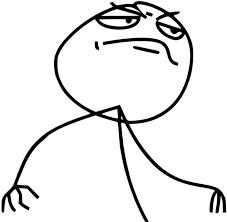